#First Problem Statement - Optimization

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define the functions
def f1(x):
    return x[0]**2 / (1 + x[1]**2 + x[2]**2)

def f2(x):
    return x[0]**2 + 2 * x[1]**2 - 2 * x[0] * x[1] - 2 * x[1]

def f3(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def f4(x):
    return (x[0] + x[1])**4 + x[1]**2

# Initial points
x0_f1 = np.array([1, 1, 1])
x0_f2 = np.array([0, 0])
x0_f3 = np.array([-1.2, 1])
x0_f4 = np.array([2, -2])

# Gradient of the functions
def grad_f1(x):
    df_dx0 = 2 * x[0] / (1 + x[1]**2 + x[2]**2)
    df_dx1 = -2 * x[0]**2 * x[1] / (1 + x[1]**2 + x[2]**2)**2
    df_dx2 = -2 * x[0]**2 * x[2] / (1 + x[1]**2 + x[2]**2)**2
    return np.array([df_dx0, df_dx1, df_dx2])

def grad_f2(x):
    df_dx0 = 2 * x[0] - 2 * x[1]
    df_dx1 = 4 * x[1] - 2 * x[0] - 2
    return np.array([df_dx0, df_dx1])

def grad_f3(x):
    df_dx0 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    df_dx1 = 200 * (x[1] - x[0]**2)
    return np.array([df_dx0, df_dx1])

def grad_f4(x):
    df_dx0 = 4 * (x[0] + x[1])**3
    df_dx1 = 4 * (x[0] + x[1])**3 + 2 * x[1]
    return np.array([df_dx0, df_dx1])

# Stopping criteria and maximum iteration limit
epsilon = 1e-8
max_iterations = 1000

# Gradient Descent algorithm
def gradient_descent(f, grad_f, x0, epsilon, max_iterations):
    x = x0
    for i in range(max_iterations):
        gradient = grad_f(x)
        step_size = 0.1
        x = x - step_size * gradient
        if np.linalg.norm(gradient) / (1 + abs(f(x))) <= epsilon:
            print("Gradient Descent converged at iteration:", i+1)
            return x
    print("Gradient Descent did not converge within the maximum number of iterations.")
    return x

# Newton's Method with regularization
def newtons_method_regularized(f, grad_f, x0, epsilon, max_iterations, regularization=1e-6):
    x = x0
    for i in range(max_iterations):
        gradient = grad_f(x)
        try:
            hessian = np.diag([2 / (1 + x[1]**2 + x[2]**2),
                               2 * x[0]**2 / (1 + x[1]**2 + x[2]**2)**2,
                               2 * x[0]**2 / (1 + x[1]**2 + x[2]**2)**2])
            hessian += regularization * np.eye(len(x))
            step = np.linalg.solve(hessian, gradient)
        except IndexError:
            print("Newton's Method with Regularization did not converge due to index error.")
            return x
        x = x - step
        if np.linalg.norm(step) / (1 + abs(f(x))) <= epsilon:
            print("Newton's Method converged at iteration:", i+1)
            return x
    print("Newton's Method did not converge within the maximum number of iterations.")
    return x

# Quasi-Newton BFGS Method
def bfgs_method(f, grad_f, x0, epsilon, max_iterations):
    result = minimize(f, x0, jac=grad_f, method='BFGS', options={'disp': True, 'maxiter': max_iterations, 'gtol': epsilon})
    if result.success:
        print("BFGS Method converged:", result.message)
        return result.x
    else:
        print("BFGS Method did not converge:", result.message)
        return result.x

# Run optimization methods for each function
functions = [(f1, grad_f1, x0_f1), (f2, grad_f2, x0_f2), (f3, grad_f3, x0_f3), (f4, grad_f4, x0_f4)]

for idx, (f, grad_f, x0) in enumerate(functions, start=1):
    print(f"\nOptimization results for f{idx}(x):")

    print("\nGradient Descent Optimization:")
    x_opt_gd = gradient_descent(f, grad_f, x0, epsilon, max_iterations)
    print("Optimal solution (Gradient Descent):", x_opt_gd)

    print("\nNewton's Method with Regularization Optimization:")
    try:
        x_opt_newton_reg = newtons_method_regularized(f, grad_f, x0, epsilon, max_iterations)
        print("Optimal solution (Newton's Method with Regularization):", x_opt_newton_reg)
    except IndexError:
        print("Newton's Method with Regularization did not converge due to index error.")

    print("\nQuasi-Newton BFGS Optimization:")
    x_opt_bfgs = bfgs_method(f, grad_f, x0, epsilon, max_iterations)
    print("Optimal solution (Quasi-Newton BFGS Method):", x_opt_bfgs)




Optimization results for f1(x):

Gradient Descent Optimization:
Gradient Descent converged at iteration: 322
Optimal solution (Gradient Descent): [1.71249648e-08 1.16706786e+00 1.16706786e+00]

Newton's Method with Regularization Optimization:
Newton's Method converged at iteration: 3
Optimal solution (Newton's Method with Regularization): [3.03744411e-17 1.99999561e+00 1.99999561e+00]

Quasi-Newton BFGS Optimization:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
BFGS Method converged: Optimization terminated successfully.
Optimal solution (Quasi-Newton BFGS Method): [1.09350711e-13 1.25215425e+00 1.25215425e+00]

Optimization results for f2(x):

Gradient Descent Optimization:
Gradient Descent converged at iteration: 225
Optimal solution (Gradient Descent): [0.99999998 0.99999999]

Newton's Method with Regularization Optimization:
Newton's Method with Regularizati

#Determine the system of differential equations governing the dynamics of each of the masses.

To derive the system of differential equations governing the dynamics of each mass in the spring-mass system, we can use Newton's second law, which states that the sum of the forces acting on an object is equal to the mass of the object times its acceleration.

Let's denote:

$ m i $ as the mass of the $i - th$ object,

$x i(t)$ as the displacement of the  $i-th$ object from its equilibrium position at time $t$,

$k i$ as the spring constant of the spring attached to the $i-th$ object,


$ k i-1 $ as the spring constant of the spring connecting the ( - 1) (i-1)-th and i-th objects,

$ k i+1 $ as the spring constant of the spring connecting the ( - 1) (i-1)-th and i-th objects,

$F i​(t)$ as the external force acting on the i-th object at time t.

Based on these notations, we can write the differential equations for each mass in the system. For the $i-th$ mass, the differential equation is:

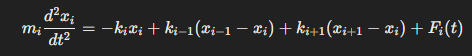

#We would like to express this problem as a set of first order differential equations (i.e. with only first derivatives). Show that each of the differen- tial equations in part 1 (which should be second order) can be expressed as two first-order differential equations.

In [ ]:
import numpy as np

def system(t, y, n, mass_list, spring_constants):
    # Initialize arrays to store velocities and accelerations
    dxdt = np.zeros(n)
    dvdt = np.zeros(n)

    # Unpack the state vector into positions and velocities
    x = y[:n]  # Positions
    v = y[n:]  # Velocities

    # Compute accelerations for each mass
    for i in range(n):
        # Compute acceleration using the second-order equation
        if i < n-1:
            dvdt[i] = (-spring_constants[i] * x[i] + spring_constants[i+1] * (x[i+1] - x[i])) / mass_list[i]

        # If not the first mass, add contribution from previous spring
        if i > 0:
            dvdt[i] += spring_constants[i-1] * (x[i-1] - x[i]) / mass_list[i]

    # Return the derivative of the state vector (positions and velocities)
    return np.concatenate((v, dvdt))

# Example usage:
n = 3  # Number of masses
mass_list = [1, 1, 1]  # Masses of the springs
spring_constants = [1, 1, 1, 1]  # Spring constants
initial_conditions = np.zeros(2 * n)  # Initial positions and velocities
t_span = (0, 10)  # Time span for simulation

# Simulate the system using numerical integration
from scipy.integrate import solve_ivp
sol = solve_ivp(lambda t, y: system(t, y, n, mass_list, spring_constants),
                t_span, initial_conditions)

# Print the solution
print(sol.y)


[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#Write a function that can generate the matrix corresponding to the equations for each of the masses in part 2.

In [ ]:
import numpy as np

def generate_matrix(n, mass_list, spring_constants, external_forces):
    # Initialize the matrix with zeros
    A = np.zeros((2*n, 2*n))

    # Fill in the coefficients for displacement equations
    for i in range(n):
        A[i, i+n] = 1  # Coefficient of velocity in displacement equation
        if i > 0:
            A[i, i-1] = -spring_constants[i-1] / mass_list[i]  # Coefficient of x_{i-1}
        A[i, i] = spring_constants[i] / mass_list[i] + spring_constants[i+1] / mass_list[i]  # Coefficient of x_i
        if i < n-1:
            A[i, i+1] = -spring_constants[i+1] / mass_list[i]  # Coefficient of x_{i+1}

    # Fill in the coefficients for velocity equations
    for i in range(n, 2*n):
        if i < 2*n - 1:
            A[i, i+1] = 1  # Coefficient of v_{i+1}
        if i >= n+1:
            A[i, i-1] = -spring_constants[i-n-1] / mass_list[i-n]  # Coefficient of v_{i-1}
        A[i, i-n] = -spring_constants[i-n] / mass_list[i-n] - spring_constants[i-n+1] / mass_list[i-n]  # Coefficient of v_i

    return A

# Example usage:
n = 3
mass_list = [1, 1, 1]
spring_constants = [1, 1, 1, 1]  # Need to add one more spring constant for n+1 springs
external_forces = [0, 0, 0]
matrix = generate_matrix(n, mass_list, spring_constants, external_forces)
print(matrix)


[[ 2. -1.  0.  1.  0.  0.]
 [-1.  2. -1.  0.  1.  0.]
 [ 0. -1.  2.  0.  0.  1.]
 [-2.  0.  0.  0.  1.  0.]
 [ 0. -2.  0. -1.  0.  1.]
 [ 0.  0. -2.  0. -1.  0.]]


#For several values of n, determine the eigenvalues of the matrix in part 3. Can you determine any general rules for what eigenvalues you expect to find (as a function of n)?

In [ ]:
import numpy as np

def calculate_eigenvalues(n_values, mass_list, spring_constants):
    eigenvalues_list = []
    for n in n_values:
        A = generate_matrix(n, mass_list[:n], spring_constants[:n+1], [0]*n)
        eigenvalues = np.linalg.eigvals(A)
        eigenvalues_list.append(eigenvalues)
    return eigenvalues_list

# Example usage:
n_values = [2, 3, 4, 5]  # List of values of n
mass_list = [1] * max(n_values)  # Masses are assumed to be equal
spring_constants = [1] * (max(n_values) + 1)  # Spring constants for n masses
eigenvalues_list = calculate_eigenvalues(n_values, mass_list, spring_constants)
for n, eigenvalues in zip(n_values, eigenvalues_list):
    print(f"Eigenvalues for n = {n}: {eigenvalues}")


Eigenvalues for n = 2: [0.41024549+1.74454325j 0.41024549-1.74454325j 2.17950902+0.j
 1.        +0.j        ]
Eigenvalues for n = 3: [0.33637527+2.04594783j 0.33637527-2.04594783j 2.72398914+0.j
 0.55339426+1.03114662j 0.55339426-1.03114662j 1.4964718 +0.j        ]
Eigenvalues for n = 4: [0.32536295+2.22023082j 0.32536295-2.22023082j 2.96513041+0.j
 0.32794651+1.43479498j 0.32794651-1.43479498j 2.01627729+0.j
 0.8559867 +0.62189058j 0.8559867 -0.62189058j]
Eigenvalues for n = 5: [0.31916169+2.3213271j  0.31916169-2.3213271j  3.09273052+0.j
 0.3028515 +1.68903717j 0.3028515 -1.68903717j 2.38813854+0.j
 0.43703299+1.0786673j  0.43703299-1.0786673j  1.2005193 +0.23450441j
 1.2005193 -0.23450441j]


#For n=20, run the system from a random initial condition. Plot the trajectories of several of the masses over time.

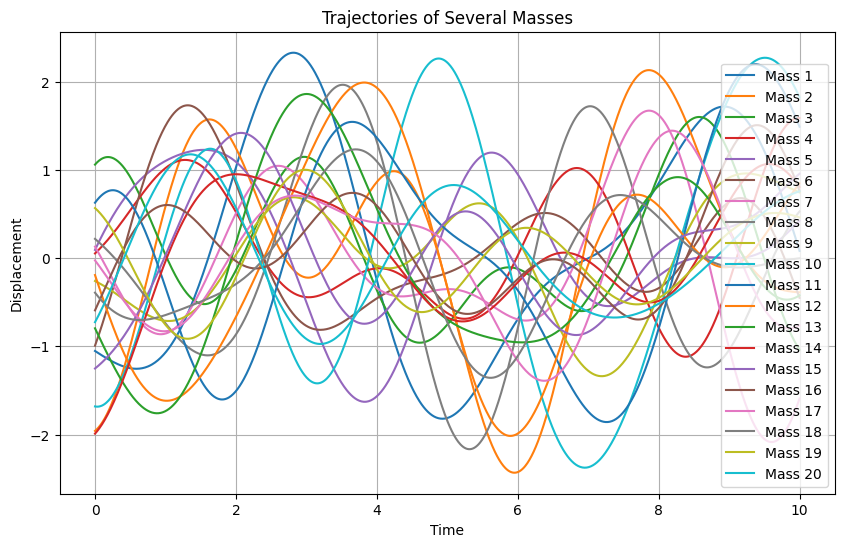

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def system(t, y, n, mass_list, spring_constants):
    x = y[:n]  # Displacements
    v = y[n:]  # Velocities
    dxdt = v
    dvdt = np.zeros(n)
    for i in range(n):
        if i == 0:
            dvdt[i] = (-spring_constants[i] * x[i] + spring_constants[i+1] * (x[i+1] - x[i])) / mass_list[i]
        elif i == n-1:
            dvdt[i] = (spring_constants[i-1] * (x[i-1] - x[i]) - spring_constants[i] * x[i]) / mass_list[i]
        else:
            dvdt[i] = (-spring_constants[i] * x[i] + spring_constants[i+1] * (x[i+1] - x[i])
                       + spring_constants[i-1] * (x[i-1] - x[i])) / mass_list[i]
    return np.concatenate((dxdt, dvdt))

# Initial conditions
n = 20
mass_list = np.ones(n)
spring_constants = np.ones(n + 1)

# Random initial conditions
initial_conditions = np.random.randn(2 * n)

# Time points for simulation
t_span = (0, 10)  # Simulation time span
t_eval = np.linspace(*t_span, 1000)  # Time points for evaluation

# Solve the ODE
sol = solve_ivp(lambda t, y: system(t, y, n, mass_list, spring_constants),
                t_span, initial_conditions, t_eval=t_eval)

# Plot the trajectories of several masses
plt.figure(figsize=(10, 6))
for i in range(20):  # Plot trajectories for the first 20 masses
    plt.plot(sol.t, sol.y[i], label=f"Mass {i+1}")
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Trajectories of Several Masses')
plt.legend()
plt.grid(True)
plt.show()


#Perform a Fourier transform of the trajectories of several of the masses and plot the frequency spectra. Can you relate your findings to the eigenvalues of the system?

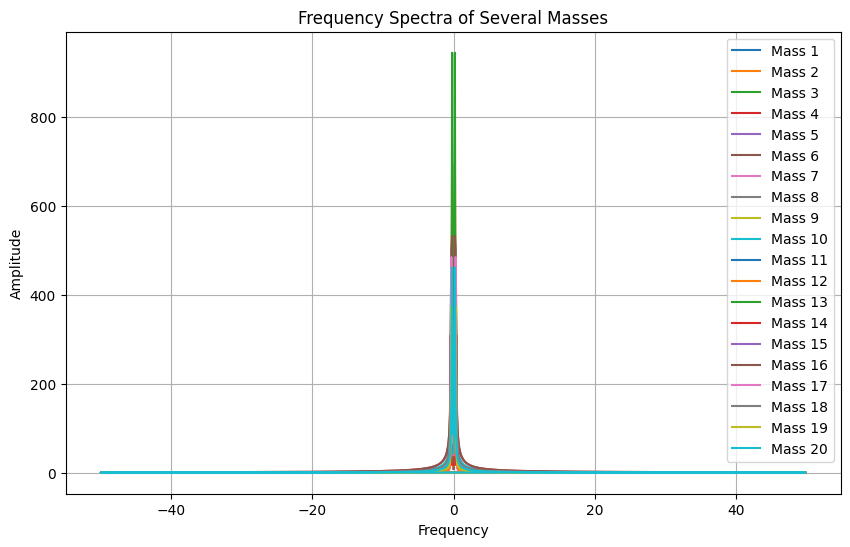

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.fft import fft

# Define the system of first-order differential equations
def system(t, y, n, mass_list, spring_constants):
    x = y[:n]  # Displacements
    v = y[n:]  # Velocities
    dxdt = v
    dvdt = np.zeros(n)
    for i in range(n):
        if i == 0:
            dvdt[i] = (-spring_constants[i] * x[i] + spring_constants[i+1] * (x[i+1] - x[i])) / mass_list[i]
        elif i == n-1:
            dvdt[i] = (spring_constants[i-1] * (x[i-1] - x[i]) - spring_constants[i] * x[i]) / mass_list[i]
        else:
            dvdt[i] = (-spring_constants[i] * x[i] + spring_constants[i+1] * (x[i+1] - x[i])
                       + spring_constants[i-1] * (x[i-1] - x[i])) / mass_list[i]
    return np.concatenate((dxdt, dvdt))

# Initial conditions
n = 20
mass_list = np.ones(n)
spring_constants = np.ones(n + 1)

# Random initial conditions
initial_conditions = np.random.randn(2 * n)

# Time points for simulation
t_span = (0, 10)  # Simulation time span
t_eval = np.linspace(*t_span, 1000)  # Time points for evaluation

# Solve the ODE
sol = solve_ivp(lambda t, y: system(t, y, n, mass_list, spring_constants),
                t_span, initial_conditions, t_eval=t_eval)

# Perform Fourier transform
frequencies = np.fft.fftfreq(len(t_eval), t_eval[1] - t_eval[0])
amplitudes = np.abs(np.fft.fft(sol.y, axis=1))

# Plot the frequency spectra
plt.figure(figsize=(10, 6))
for i in range(20):  # Plot spectra for the first 20 masses
    plt.plot(frequencies, amplitudes[i], label=f"Mass {i+1}")
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Spectra of Several Masses')
plt.legend()
plt.grid(True)
plt.show()
